In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
import seaborn as sns
from intercluster.plotting import *

%load_ext autoreload
%autoreload 2

In [2]:
# This assumes tex is installed in your system, 
# if not you may simply remove most of this aside from font.size
# To get tex working on linux run the following:
# `sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super`
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": [],
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.size": 32
})

palette = sns.color_palette("husl", 8)
cmap = ListedColormap(palette)

subset_colors = [cmap(1), cmap(5), cmap(3), cmap(6), cmap(7), cmap(0), cmap(2)]
cmap_subset = ListedColormap(subset_colors)

distortion_colors = [cmap(5), cmap(1), cmap(3), cmap(6), cmap(7), cmap(0)]
distortion_cmap = ListedColormap(distortion_colors)

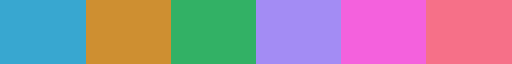

In [3]:
distortion_cmap

# Experiment Plotting:
The following is what we use to gather computed information and produce plots/tables. Note that 
our distribution plots are more reliant upon having the data readily available, and 
are therefore plotted as a part of the `interpretable_measurements.py` and `explanation_tree.py`
files. 

In [26]:
# Specify a dataset
dataset = 'fashion'

### Coverage-Distortion Experiments

In [9]:
# Load experiment results
fname = "../data/experiments/" + dataset + "/relative_coverage/exp_test.csv"
experiment_df = pd.read_csv(fname, header=[0, 1, 2, 3], index_col=0)

# Computes statistics:
#grouped = experiment_df.T.groupby(level = [0,1,2])
#mean_df = grouped.mean().T
#std_df = grouped.std().T

In [6]:
# The following subset of the dataframe 
# shows 1000 samples where forest depth 2 is compared to KMeans and IMM. 
# Specifically, for KMeans and IMM the cost is given only for the set of points which forest covers.
experiment_df['normalized-clustering-cost']['Forest-Depth-2']

,Forest-Depth-2,KMeans,IMM,Forest-Depth-2,KMeans,IMM,Forest-Depth-2,KMeans,IMM,Forest-Depth-2,...,IMM,Forest-Depth-2,KMeans,IMM,Forest-Depth-2,KMeans,IMM,Forest-Depth-2,KMeans,IMM
,0,0,0,1,1,1,2,2,2,3,...,996,997,997,997,998,998,998,999,999,999
0,11.086835,10.951656,11.452357,10.964701,10.812427,11.373273,11.056962,10.933270,11.478594,11.013573,...,11.608616,11.047596,10.931162,11.438132,11.094588,10.983630,11.493237,11.208581,11.072499,11.439533
1,11.086835,10.951656,11.452357,10.964701,10.812427,11.373273,11.056962,10.933270,11.478594,11.013573,...,11.608616,11.047596,10.931162,11.438132,11.094588,10.983630,11.493237,11.208581,11.072499,11.439533
2,11.086835,10.951656,11.452357,10.964701,10.812427,11.373273,11.056962,10.933270,11.478594,11.013573,...,11.608616,11.047596,10.931162,11.438132,11.094588,10.983630,11.493237,11.208581,11.072499,11.439533
3,11.086835,10.951656,11.452357,10.964701,10.812427,11.373273,11.056962,10.933270,11.478594,11.013573,...,11.608616,11.047596,10.931162,11.438132,11.094588,10.983630,11.493237,11.208581,11.072499,11.439533
4,11.086835,10.951656,11.452357,10.964701,10.812427,11.373273,11.056962,10.933270,11.478594,11.013573,...,11.608616,11.047596,10.931162,11.438132,11.094588,10.983630,11.493237,11.208581,11.072499,11.439533
5,11.086835,10.951656,11.452357,10.964701,10.812427,11.373273,11.056962,10.933270,11.478594,11.013573,...,11.608616,11.047596,10.931162,11.438132,11.094588,10.983630,11.493237,11.208581,11.072499,11.439533
6,11.086835,10.951656,11.452357,10.964701,10.812427,11.373273,11.056962,10.933270,11.478594,11.013573,...,11.608616,11.047596,10.931162,11.438132,11.094588,10.983630,11.493237,11.208581,11.072499,11.439533
7,11.308005,11.161902,11.597560,11.144882,11.016935,11.417879,11.327160,11.194815,11.674933,11.233446,...,11.468839,11.317257,11.184412,11.621994,11.322941,11.205329,11.649956,11.377190,11.240797,11.734459
8,11.736009,11.491648,12.071617,11.707937,11.415630,11.998174,11.817203,11.550482,11.978164,11.815369,...,12.090020,11.940366,11.613090,12.050427,11.948342,11.624590,12.064454,12.046911,11.603723,12.096188


In [7]:
# Colors and Modules for plotting:
colormap = distortion_cmap
baseline_list = ['KMeans-Full', 'IMM-Full']

# This is just a list of column names to look up in the dataframe
module_list = ['IMM', 'IMM-outliers', 'Forest-Depth-2', 
               'Forest-Depth-3','Forest-Depth-4']

# And these are their corresponding latex versions
legend_module_list = [r'\texttt{IMM}', r'\texttt{IMM-outliers}', r'\texttt{Forest-Depth-2}', 
               r'\texttt{Forest-Depth-3}',r'\texttt{Forest-Depth-4}']

# We give colors to each as follows
color_dict = {mod : i for i,mod in enumerate(module_list)}

/var/folders/y5/6hc4_5cn483fdcbj8gdfmk380000gn/T/ipykernel_16274/2061722544.py:33: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  plot_df = distortion_df.groupby(level=0, axis=1).mean()
/var/folders/y5/6hc4_5cn483fdcbj8gdfmk380000gn/T/ipykernel_16274/2061722544.py:34: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  plot_std_df = distortion_df.groupby(level=0, axis=1).std()


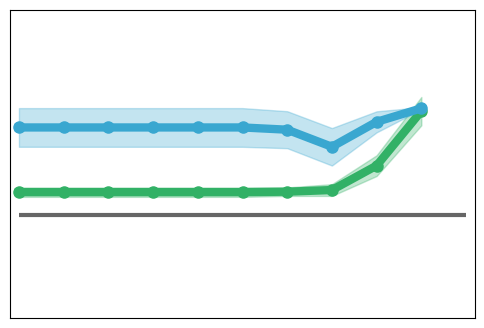

In [8]:
# Specify the model:
model = 'Forest-Depth-2'

# And then we'll compute ratios for clustering costs:
measure = 'normalized-clustering-cost'
xlabel = 'minimum coverage'
ylabel = 'distortion'

# Uncomment here to save:
#fname = '../figures/relative_coverage/' + ylabel + '/' + dataset + '/' + model + '.png'
fname = None

xaxis = False
if dataset == 'fashion':
    xaxis = True

yaxis = False
if model == 'IMM-outliers':
    yaxis = True

if not xaxis:
    xlabel = ''
if not yaxis:
    ylabel = ''

# Compute distortion with cost ratios:
cost_df = experiment_df[measure][model]

# Divide by the reference:
distortion_df = cost_df[[model, 'IMM', 'KMeans']].div(cost_df['KMeans'], level=1)

# Find the mean and standard deviation
plot_df = distortion_df.groupby(level=0, axis=1).mean()
plot_std_df = distortion_df.groupby(level=0, axis=1).std()

# More plotting info:
plot_colors = [colormap(color_dict[mod]) for mod in plot_df.columns if mod != 'KMeans']
plot_cmap = ListedColormap(plot_colors)
domain_array = np.array([list(np.linspace(0.5,1,11))] * len(plot_df.columns)).T
domain_df = pd.DataFrame(domain_array, columns = plot_df.columns)

xlim = (0.49, 1.01)
#ylim = (plot_df.min().min() - 0.05, plot_df.max().max() + 0.05)

if dataset == 'climate':
    ylim = (0.95, 1.1)
elif dataset == 'anuran':
    ylim = (0.95, 1.7)
elif dataset == 'covertype':
    ylim = (0.95, 1.4)
elif dataset == 'digits':
    ylim = (0.95, 1.7)
elif dataset == 'mnist':
    ylim = (0.95, 1.25)
elif dataset == 'fashion':
    ylim = (0.95, 1.4)

experiment_plotter(
    plot_df,
    plot_std_df,
    domain_df,
    xlabel = xlabel,
    ylabel = ylabel,
    cmap = plot_cmap,
    baseline_list = ['KMeans'],
    legend = False,
    xlim = xlim,
    ylim = ylim,
    xaxis = xaxis,
    yaxis = yaxis,
    filename = fname,
)

(0.0, 1.0, 0.0, 1.0)

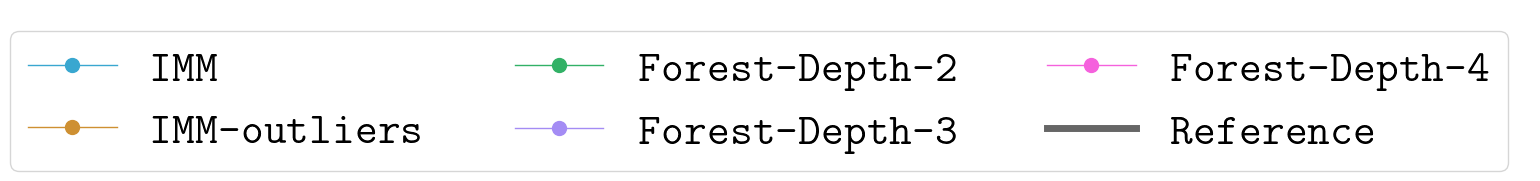

In [ ]:
# Legend:
fig, ax = plt.subplots(figsize = (6,1))
legend_elements = [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=10,
        color=colormap(i),
        lw=1,
        label=mod,
        alpha=1
    )
    for i,mod in enumerate(legend_module_list)
]

legend_elements += [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=0,
        color='k',
        lw=5,
        linestyle = '-',
        label=r"\texttt{Reference}",
        alpha=0.6
    )
]

ax.legend(handles=legend_elements, ncol=3)
ax.axis('off')
#plt.savefig('../figures/relative_coverage/distortion_legend.png', bbox_inches = 'tight', dpi = 300)

### Interpretable Measurements:

In [27]:
# Interpretable Measurements Table
fname = "../data/experiments/" + dataset + "/measurements.csv"
inter_measures_df = pd.read_csv(fname, index_col=0)
inter_measures_df

,coverage,max-rule-length,normalized-clustering-cost,overlap,weighted-average-rule-length
Row,,,,,
forest_depth_2,0.819086,2.0,35.508812,1.160737,2.000000
forest_depth_3,0.809543,3.0,33.223462,1.113150,3.000000
forest_depth_4,0.835143,4.0,32.328097,1.075334,3.627513
forest_depth_imm,0.823486,7.0,32.266952,1.083755,3.802600
imm,1.000000,7.0,39.302320,1.000000,5.052857
outlier,0.800057,6.0,36.508056,1.000000,4.946861


In [28]:
# Additional Results for explanation tree
fname = "../data/experiments/" + dataset + "/explanation_tree.csv"
explanation_tree_df = pd.read_csv(fname, index_col=0)
explanation_tree_df

,normalized-clustering-cost,overlap,coverage,max-rule-legnth,weighted-average-rule-length
0,29.855588,1.0,0.715771,7,5.109452
